# Function logfilter

## Synopse

Laplacian of Gaussian filter.

- **g = logfilter(f, sigma)**

  - **g**: Image.

  - **f**: Image. input image
  - **sigma**: Double. scaling factor

## Description

Filters the image f by the Laplacian of Gaussian (LoG) filter with parameter sigma. This filter is also known as the Marr-Hildreth filter. Obs: to better efficiency, this implementation computes the filter in the frequency domain.

In [1]:
import numpy as np
def logfilter(f, sigma):
    import ia898.src as ia
    
    f = np.array(f)

    if len(f.shape) == 1: f = f[newaxis,:]
    x = (np.array(f.shape)//2).astype(int)
    
    h = ia.log(f.shape, (np.array(f.shape)//2).astype(int), sigma)
    h = ia.dftshift(h)
    H = np.fft.fft2(h)
    if not ia.isccsym(H):
        raise ValueError('log filter is not symmetrical')        
    G = np.fft.fft2(f) * H
    g = np.fft.ifft2(G).real
    
    return g


## Examples

In [2]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python logfilter.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook logfilter.ipynb to python
[NbConvertApp] Writing 2015 bytes to logfilter.py


### Example 1

""
Imagem original
""
LoG filter
""
positive values

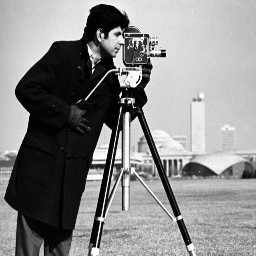
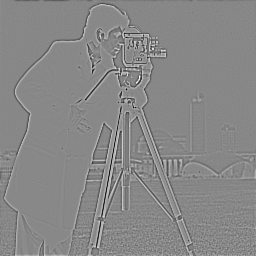
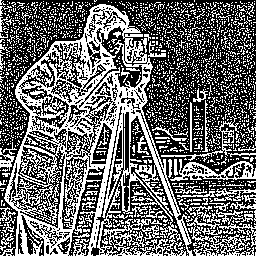

In [3]:
if testing:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    f = mpimg.imread('../data/cameraman.tif')

    g07 = ia.logfilter(f, 0.7)

    nb = ia.nbshow(3)
    nb.nbshow(f, 'Imagem original')
    nb.nbshow(ia.normalize(g07), 'LoG filter')
    nb.nbshow(g07 > 0, 'positive values')
    nb.nbshow()

### Example 2

""
sigma=5
""
"positive, sigma=5"
""
sigma=10
""
"positive, sigma=10"

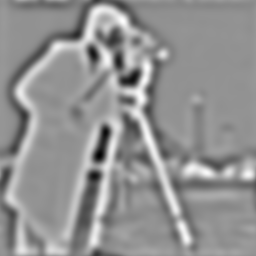
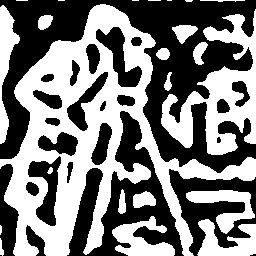
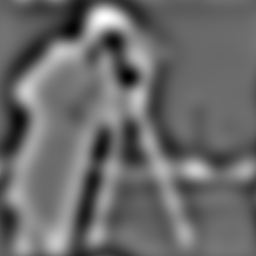
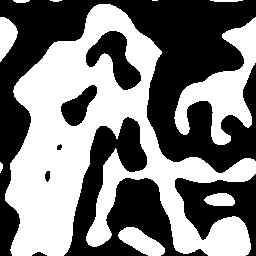

In [4]:
if testing:
    g5 = ia.logfilter(f, 5)
    g10 = ia.logfilter(f, 10)

    nb = ia.nbshow(2,2)
    nb.nbshow(ia.normalize(g5), 'sigma=5')
    nb.nbshow(g5 > 0, 'positive, sigma=5')
    nb.nbshow(ia.normalize(g10), 'sigma=10')
    nb.nbshow(g10 > 0, 'positive, sigma=10')
    nb.nbshow()